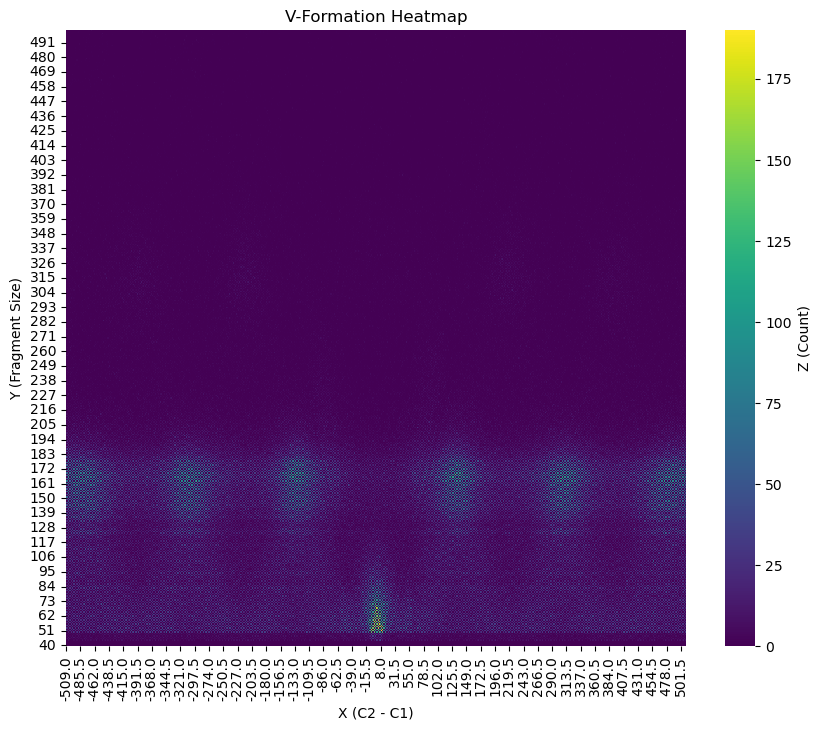

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('mapped.bed.gz', sep='\t', header=None, compression='gzip')

data['C1'] = (data[2] + data[3]) / 2
data['C2'] = (data[8] + data[9]) / 2
data['X'] = data['C2'] - data['C1']
data['Y'] = data[9] - data[8]

heatmap_data = data.groupby(['X', 'Y']).size().reset_index(name='Z')

heatmap_pivot = heatmap_data.pivot(index='Y', columns='X', values='Z').fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_pivot, cmap='viridis', cbar_kws={'label': 'Z (Count)'})
plt.title('V-Formation Heatmap')
plt.xlabel('X (C2 - C1)')
plt.ylabel('Y (Fragment Size)')
plt.gca().invert_yaxis()
plt.show()